# Amittai W

## Computational Comparative Literature

### Imports

In [1]:
import warnings

# ignore bugging deprecation warnings.
with warnings.catch_warnings():
  warnings.filterwarnings("ignore", category=DeprecationWarning)

  # essential imports
  import matplotlib.pyplot as plt
  import random
  import numpy as np
  import pandas as pd
  from pandas import DataFrame
  pd.set_option('display.max_rows', 600)
  from sklearn.feature_extraction.text import TfidfVectorizer
  import glob
  from os import path
  from IPython.display import display, HTML

  # LDA analysis
  import pyLDAvis
  import pyLDAvis.gensim_models
  import pickle

  # visualize word-clouds
  from wordcloud import WordCloud

  # Visualize Cosine Similarities
  from sklearn.metrics.pairwise import linear_kernel
  from sklearn.metrics import ConfusionMatrixDisplay

  # %pip install gensim
  import gensim.corpora as corpora
  import gensim
  
  # tensrflow
  import tensorflow as tf


  import os

  # type annotations
  from typing import List, Tuple, Set


/root/anaconda3/envs/CompLit/lib/python3.9/site-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()
/root/anaconda3/envs/CompLit/lib/python3.9/site-packages/h5py/__init__.py:46: DeprecationWarning: `np.typeDict` is a deprecated alias for `np.sctypeDict`.
  from ._conv import register_converters as _register_converters


In [2]:
# stop words

class Colors:
  HEADER = '\033[95m'
  OKBLUE = '\033[94m'
  OKCYAN = '\033[96m'
  OKGREEN = '\033[92m'
  WARNING = '\033[93m'
  FAIL = '\033[91m'
  ENDC = '\033[0m'
  BOLD = '\033[1m'
  UNDERLINE = '\033[4m'

def load_stopwords():
  stopwords = []
  with open("../data/metadata/stopwords.txt") as f:
    for line in f:
      # print(line)
      stopwords.append(line.strip()) # .append(line.strip())
  return stopwords

stop_words = load_stopwords()

print(Colors.OKBLUE + "Hello, welcome to my project!" + Colors.ENDC)
print(f"{stop_words = }")

Hello, welcome to my project!
stop_words = ['a', 'able', 'about', 'above', 'abst', 'accordance', 'according', 'accordingly', 'across', 'act', 'actually', 'added', 'adj', 'affected', 'affecting', 'affects', 'after', 'afterwards', 'again', 'against', 'ah', 'all', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'an', 'and', 'announce', 'another', 'any', 'anybody', 'anyhow', 'anymore', 'anyone', 'anything', 'anyway', 'anyways', 'anywhere', 'apparently', 'approximately', 'are', 'aren', 'arent', 'arise', 'around', 'as', 'aside', 'ask', 'asking', 'at', 'auth', 'available', 'away', 'awfully', 'b', 'back', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'begin', 'beginning', 'beginnings', 'begins', 'behind', 'being', 'believe', 'below', 'beside', 'besides', 'between', 'beyond', 'biol', 'both', 'brief', 'briefly', 'but', 'by', 'c', 'ca', 'came', 'can', 'cannot', "can't", 'cause', 'causes', 'certain', 'cert

In [3]:
# years to focus on
years = [str(yr) for yr in range(2000, 2023)]

# max count per year
max_count = 10

print(f"Using year range {years[0]} to {years[-1]}") # , max_count

Using year range 2000 to 2022


1.

In [4]:
# load $count files for each year.
directory_path = "../data/categorized"

def load_dictionary():
  # all_words = []
  dictionary = set()
  dictionary_file = "../data/metadata/dictionary"
  with open(dictionary_file) as f:
    for line in f:
      dictionary.add(line.strip().lower())
  return dictionary

def load_counts():
  with open("../data/metadata/counts.csv", "r") as counts_file:
    counts = pd.read_csv(counts_file)
  return counts

def load_words() -> List[List[str]]:
  """Load data (words) into a list of lists of words."""
  dictionary = load_dictionary()
  stop_words = load_stopwords()
  all_words = []
  for year in years:
    possible_files = [f for f in glob.glob(f"{directory_path}/{year}/*.txt") if path.exists(f)]
    num_files = min(max_count, len(possible_files))
    files = np.random.choice(possible_files, size=num_files, replace=True)
    words = []
    for file in files:
      with open(file) as f:
        for line in f:
          for word in line.strip().lower().split():
            if word in dictionary and word not in stop_words + ["old", "id"]:
              words.append(word)
    # pd = DataFrame([year, words], columns=["year", "words"])
    all_words.append(words)
  return all_words

all_words = load_words()
def load_words_str():
  """Load data (words) into a list of strings."""
  global all_words
  if "all_words" not in globals():
    all_words = load_words()
  return [" ".join(w) for w in all_words]

def load_data():
  """Load data (words0 into a dataframe)"""
  all_words = load_words_str()
  df = pd.DataFrame(all_words, columns = ["words"])
  df.insert(0, "year", years, allow_duplicates=False)
  return df

raw_data = load_data()
raw_data.head(100)


,year,words
0,2000,learn success tiny african country economic fo...
1,2001,technology technology second series big ray si...
2,2002,pentagon ai predict days future guide better p...
3,2003,ready synthetic plan create ready synthetic pl...
4,2004,complete guide wired visit saved visit saved a...
5,2005,cognitive vulnerability major view intrinsic n...
6,2006,apple define future wired visit saved visit sa...
7,2007,congress police surveillance congress law surv...
8,2008,early acid early acid winter young swiss docto...
9,2009,inheritance drug effects nicotine design artic...


In [5]:
# load stopwords
stop_words = load_stopwords()
print(f"First 10 stopwords: {stop_words[0:10]}")

First 10 stopwords: ['a', 'able', 'about', 'above', 'abst', 'accordance', 'according', 'accordingly', 'across', 'act']


In [6]:
# initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(input='content', stop_words=load_stopwords(), strip_accents="ascii")
tfidf_vector = tfidf_vectorizer.fit_transform(raw_data["words"])


tfidf_df = pd.DataFrame(tfidf_vector.toarray(), index=[str(year) for year in years], columns=tfidf_vectorizer.get_feature_names_out())
# data.append(tfidf_df)
data = tfidf_df
data.loc["document"] = data.sum(axis=0)

/root/anaconda3/envs/CompLit/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['didn', 'doesn', 'don', 'hasn', 'haven', 'isn', 'keep', 'keeps', 'll', 'shouldn', 'sure', 've'] not in stop_words.
  warnings.warn(


In [7]:
# Re-organize so words are in rows rather than columns
cleaned_data = data.sort_index().stack().reset_index()
cleaned_data = cleaned_data.rename(columns={0:'tfidf', 'level_0': 'year','level_1': 'term', 'level_2': 'term'})
# stacked_tfidf_df.sample(n=20)
print(f"Random sample of words and years from cleaned_data:")
cleaned_data.sample(n=20)

Random sample of words and years from cleaned_data:


,year,term,tfidf
145754,2010,prog,0.000000
93955,2006,tendon,0.000000
213887,2015,probable,0.000000
321443,document,mower,0.002395
153327,2011,dichroic,0.000000
89488,2006,mist,0.000000
158177,2011,oat,0.000000
252252,2018,larry,0.000000
176403,2012,underpin,0.000000
269971,2019,shiloh,0.000000


In [8]:
# top 10 words for all stories
#! MemoryError: Unable to allocate 97.5 GiB for an array with shape (23351, 560214) and data type float64
top_tfidf = cleaned_data.groupby(['year', 'term'])['tfidf'].sum().sort_values(ascending=False).groupby('year')
DataFrame(top_tfidf.head(1000))

tfidf
year     term                 
document data         1.896324
         human        1.217271
         protein      1.163885
         ai           1.152277
         singularity  1.121442
...                        ...
2010     tend         0.000000
         tempting     0.000000
         terminally   0.000000
         terminate    0.000000
         termination  0.000000

[24000 rows x 1 columns]

In [9]:
# view the top words by year.

for year, data in top_tfidf:
  print(data.head(20))
  print("\n")


year  term       
2000  cognitive      0.319584
      casino         0.278108
      task           0.270181
      benjamin       0.196782
      network        0.192284
      brain          0.170641
      recruitment    0.168897
      integration    0.163060
      indoor         0.157155
      noah           0.155954
      system         0.151609
      null           0.151003
      functional     0.146675
      dynamic        0.140712
      venus          0.139054
      motor          0.114167
      cartography    0.109222
      workplace      0.093090
      allegiance     0.092839
      community      0.087051
Name: tfidf, dtype: float64


year  term      
2001  course        0.466045
      covenant      0.341684
      phantom       0.333782
      learning      0.154942
      blended       0.139989
      reading       0.120411
      mode          0.118629
      sound         0.117568
      computer      0.116662
      student       0.110514
      freehand      0.109676
      assessment

2.

In [45]:
# check for a single word
def check_word(df, word, sorted=True):
  """Check the occurrence of a word in a dataframe."""
  _df = df[df["year"] != "document"]
  if sorted:
    return _df[_df['term'] == word].sort_values("tfidf", ascending=False)
  return _df[_df['term'] == word]

def plot_words(df, words: List[str]):
  """Plot the occurrence of a list of words in a dataframe."""
  plt.rcParams["figure.figsize"] = (20,10)
  plt.title("Word TF-IDF scores by Year.")
  plt.xlabel("YEAR")
  plt.ylabel("TF-IDF")
  highest = -np.inf
  plt.grid()
  colors = ["#"+''.join([random.choice('0A1B2C3D4E5F6978') for j in range(6)]) for i in range(len(words))]
  for i, word in enumerate(words):
    occurrences = check_word(df, word, sorted=False)
    plt.plot(occurrences["year"], occurrences["tfidf"], color=colors[i], label=word)
    try: 
      highest = max(highest, max(occurrences["tfidf"]))
    except ValueError: pass  # ignore empty sequences
  plt.yticks(np.arange(0, highest + highest/10, highest/10))
  plt.legend(loc="upper left")
  plt.show()

print(colors)

NameError: name 'colors' is not defined

/tmp/ipykernel_15653/947984076.py:22: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.plot(occurrences["year"], occurrences["tfidf"], color=colors[i], label=word)


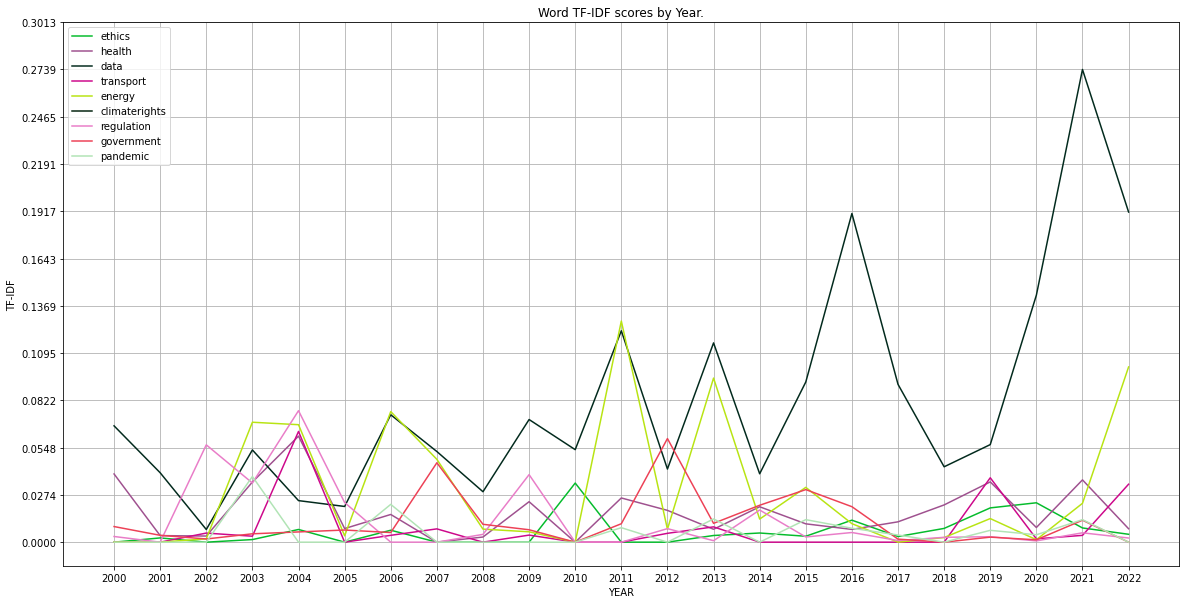

In [44]:
plot_words(cleaned_data, ["ethics", "health", "data", "transport", "energy", "climate" "rights", "regulation", "government", "pandemic"])

In [12]:
check_word(cleaned_data, "death", 20)

,year,term,tfidf
262099,2019,death,0.055969
57574,2004,death,0.014709
180289,2013,death,0.013522
125749,2009,death,0.010699
98479,2007,death,0.010065
153019,2011,death,0.006621
221194,2016,death,0.006372
112114,2008,death,0.005134
84844,2006,death,0.003458
207559,2015,death,0.003432


## Latent Dirichlet Allocation (LDA)

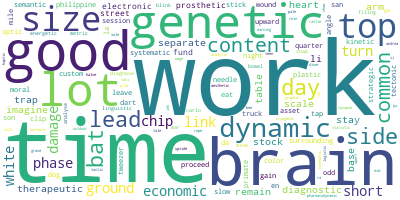

,year,term,tfidf
316609,document,data,1.896324
319393,document,human,1.217271
323100,document,protein,1.163885
313916,document,ai,1.152277
324647,document,singularity,1.121442
...,...,...,...
321370,document,monolithic,0.001701
324879,document,spalling,0.001701
324890,document,sparsely,0.001701
325843,document,thinkable,0.001701


In [13]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

sorted_words = cleaned_data[cleaned_data["year"] == "document"].sort_values("tfidf", ascending=False)
words = ",".join(sorted_words["term"].values)
# Generate a word cloud
wordcloud.generate(words)
# Visualize the word cloud
display(wordcloud.to_image())
sorted_words

In [14]:
import gensim.corpora as corpora

# ! re-use 'all_words' variable defined earlier.
# all_words = load_words()

id2word = corpora.Dictionary(all_words)

# Term Document Frequency
corpus = [id2word.doc2bow(year_data) for year_data in all_words]
# View
print(corpus[:1][0][:30])

[(0, 7), (1, 8), (2, 1), (3, 6), (4, 3), (5, 3), (6, 1), (7, 1), (8, 1), (9, 3), (10, 3), (11, 1), (12, 13), (13, 1), (14, 1), (15, 1), (16, 4), (17, 1), (18, 1), (19, 11), (20, 1), (21, 7), (22, 6), (23, 2), (24, 3), (25, 6), (26, 2), (27, 8), (28, 6), (29, 2)]


In [15]:
from pprint import pprint
# number of topics
print(corpus[:1][0][:30])
num_topics = 10
# Build LDA model
def build_lda():
  """Build LDA model."""
  lda_model = gensim.models.LdaMulticore(corpus=corpus, id2word=id2word, num_topics=num_topics, random_state=100, chunksize=100, passes=2, workers=8)
  # Print the Keyword in the 10 topics
  pprint(lda_model.print_topics())
  doc_lda = lda_model[corpus]
  print(f"doc_lda: {doc_lda}")
  return lda_model

[(0, 7), (1, 8), (2, 1), (3, 6), (4, 3), (5, 3), (6, 1), (7, 1), (8, 1), (9, 3), (10, 3), (11, 1), (12, 13), (13, 1), (14, 1), (15, 1), (16, 4), (17, 1), (18, 1), (19, 11), (20, 1), (21, 7), (22, 6), (23, 2), (24, 3), (25, 6), (26, 2), (27, 8), (28, 6), (29, 2)]


In [16]:
# Visualize the topics
pyLDAvis.enable_notebook()
# LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))
LDAvis_data_filepath = f"ldavis_prepared_{str(num_topics)}"
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself

rebuild = False  # change this to rebuild the visualization
if rebuild:
    lda_model = build_lda()
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)


# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, f"{LDAvis_data_filepath}.html")
LDAvis_prepared

[(0,
  '0.010*"segmentation" + 0.009*"clinical" + 0.008*"macular" + 0.007*"data" + '
  '0.007*"learning" + 0.006*"model" + 0.006*"supplementary" + 0.006*"deep" + '
  '0.006*"retinal" + 0.006*"performance"'),
 (1,
  '0.006*"repair" + 0.005*"data" + 0.004*"human" + 0.004*"singularity" + '
  '0.004*"cell" + 0.003*"power" + 0.003*"people" + 0.003*"team" + 0.003*"time" '
  '+ 0.003*"complex"'),
 (2,
  '0.004*"conference" + 0.004*"logic" + 0.004*"artificial" + 0.004*"evidence" '
  '+ 0.003*"international" + 0.003*"meditation" + 0.003*"data" + '
  '0.003*"nuclein" + 0.003*"intelligence" + 0.003*"time"'),
 (3,
  '0.006*"task" + 0.005*"cognitive" + 0.005*"protein" + 0.004*"system" + '
  '0.004*"activity" + 0.004*"brain" + 0.004*"human" + 0.004*"time" + '
  '0.004*"replication" + 0.004*"network"'),
 (4,
  '0.005*"data" + 0.004*"ai" + 0.004*"human" + 0.003*"people" + '
  '0.003*"protein" + 0.003*"model" + 0.003*"work" + 0.003*"activity" + '
  '0.002*"control" + 0.002*"cognitive"'),
 (5,
  '0.011*

/root/anaconda3/envs/CompLit/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/root/anaconda3/envs/CompLit/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/root/anaconda3/envs/CompLit/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/root/anaconda3/envs/CompLit/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/root/anaconda3/envs/CompLit/lib/

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.040072 -0.016102       1        1  20.009290
0     -0.103700  0.005104       2        1  17.485231
5      0.017352  0.083790       3        1  14.939604
8      0.010534 -0.015165       4        1  11.701361
6      0.004538 -0.003871       5        1  11.104519
1      0.041037 -0.012734       6        1  10.237682
7     -0.024230 -0.015936       7        1   7.889400
2      0.002487 -0.027588       8        1   5.079168
4      0.011455  0.009255       9        1   1.042067
9      0.000456 -0.006753      10        1   0.511677, topic_info=              Term         Freq        Total Category  logprob  loglift
534           data  1972.000000  1972.000000  Default  30.0000  30.0000
6358  segmentation   724.000000   724.000000  Default  29.0000  29.0000
1663       protein   785.000000   785.000000  Default  28.0000  28.0000
1369         model  1053.000000  1053.000000  Default  27.0000  27.0000
469        control   692.000000   692.000000  Default  26.0000  26.0000
...            ...          ...          ...      ...      ...      ...
71              ai     3.132782   913.058283  Topic10  -6.2320  -0.3996
1528        people     3.005109   846.237650  Topic10  -6.2736  -0.3653
1015          help     2.556438   489.878724  Topic10  -6.4353   0.0197
2117    technology     2.585787   752.379982  Topic10  -6.4239  -0.3980
1919           set     2.567137   634.188898  Topic10  -6.4311  -0.2343

[844 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
6545      1  0.056467  aberrant
6545      2  0.056467  aberrant
6545      3  0.056467  aberrant
6545      4  0.479973  aberrant
6545      5  0.225870  aberrant
...     ...       ...       ...
5587      4  0.072293      yang
5587      5  0.072293      yang
5587      6  0.578340      yang
5587      7  0.036146      yang
5587      8  0.036146      yang

[4133 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 6, 9, 7, 2, 8, 3, 5, 10])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9aea91d7-4b5b-4bfd-9aea-233a34d76dbe' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>

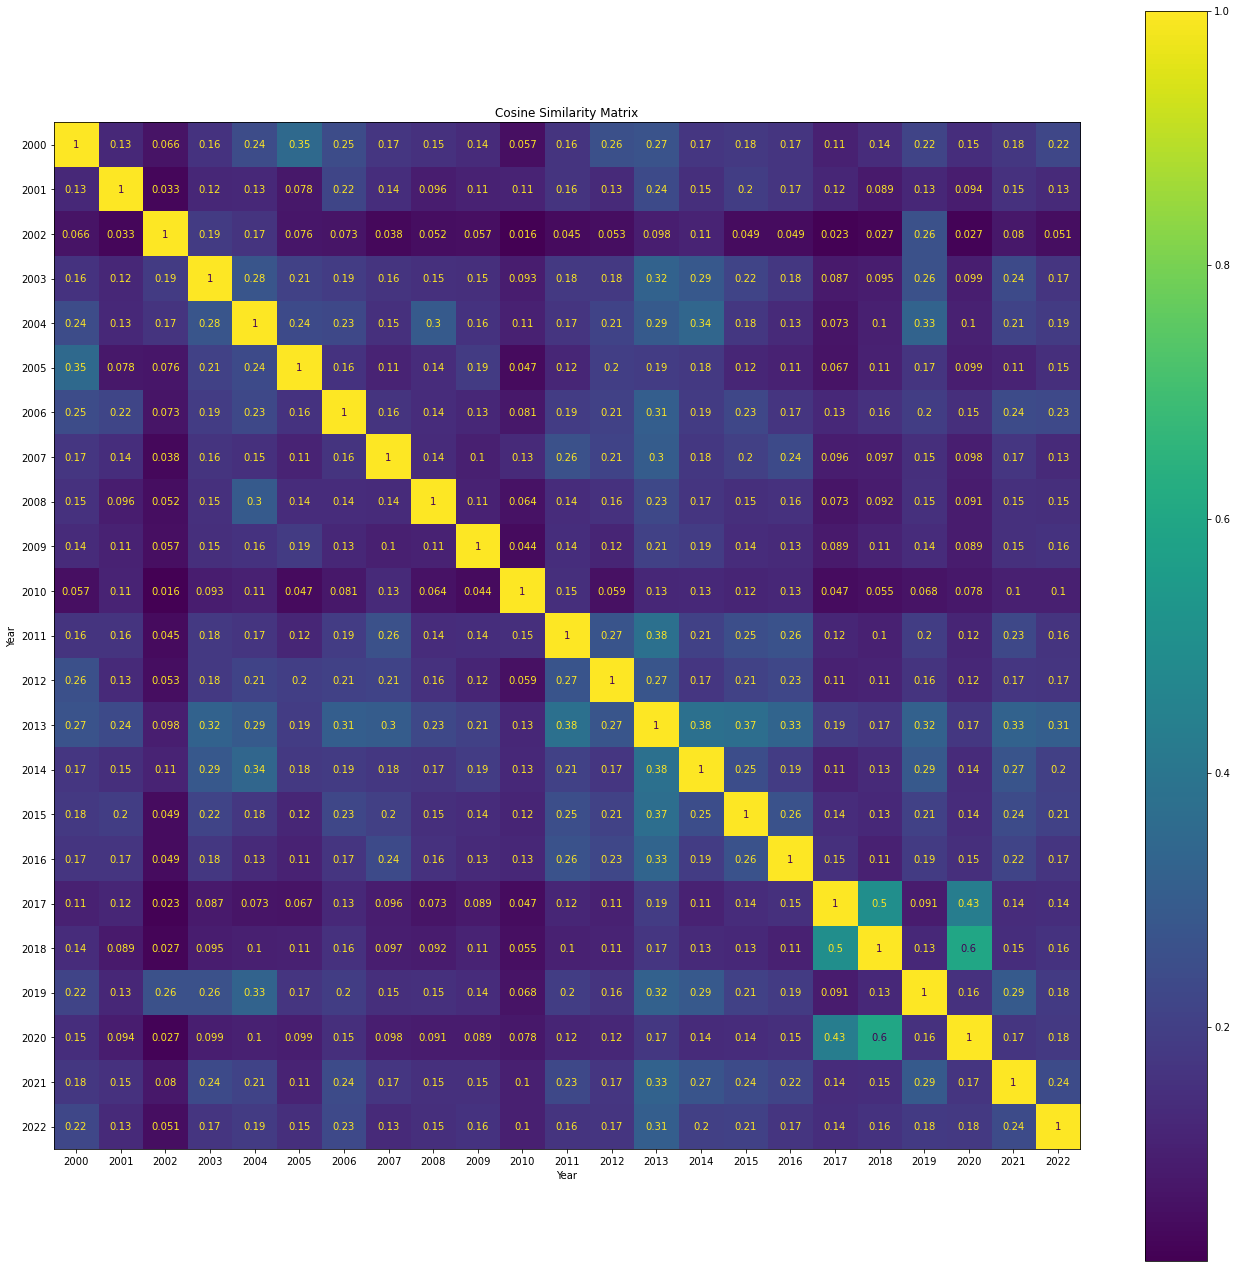

In [17]:
years_df = tfidf_df.drop(labels=["document"])
years = list(range(2000, 2023))
size=len(years)

cosine_sim = linear_kernel(years_df, years_df)
plot = ConfusionMatrixDisplay(cosine_sim, display_labels=years)
fig, ax = plt.subplots(figsize=(size, size))
ax.set (
  xticks=np.arange(size),
  yticks=np.arange(size),
  xticklabels=years,
  yticklabels=years,
  title="Cosine Similarity Matrix",
  xlabel="Year",
  ylabel="Year"
)
plot.plot(ax=ax)
plt.xlabel("Year")
plt.ylabel("Year")
plt.show()

# Let's do Predictive Analysis!

In [18]:
# let's summon back our raw text!
raw_text = all_words

vocab = { word for word_list in raw_text for word in word_list }
    
vocab = sorted(vocab)
print(f"Loaded vocabulary of {len(vocab)} unique words.")

Loaded vocabulary of 13636 unique words.


In [19]:
# Utility functions to convert text to TF ids and back

class Parser():
  def __init__(self, text: List[str]):

    all_text = " ".join(text)
    vocab = sorted((set(all_text)))
    self.vocab = list(vocab)
    self.char2id = tf.keras.layers.StringLookup(vocabulary=self.vocab, mask_token=None)
    self.id2char = tf.keras.layers.StringLookup(vocabulary=self.char2id.get_vocabulary(), invert=True, mask_token=None)

    self.dataset = tf.data.Dataset.from_tensor_slices(self.char2id(tf.strings.unicode_split(all_text, input_encoding="UTF-8")))
    print(f"{len(self.dataset) = }")
    print(self.dataset.take(1))
    
    print(f"dataset: {self.dataset}")
    print(f"{len(self.vocab)} unique characters")
    # for ids in self.dataset.take(10):
    #   print(f"{ids = }")
      # print(self.get_words(ids)) # .numpy().decode('utf-8'))

    sequences = self.dataset.batch(101, drop_remainder=True)
    for seq in sequences.take(1):
      print(self.id2char(seq))
    
  def parse(self, text):
    words = text.strip().split()
    # print(words)
    chars = tf.strings.unicode_split(words, input_encoding="UTF-8")
    print(chars)
    return self.char2id(chars)

  def build_dataset(self, text):
    """Build a dataset of TF ids."""
    self.ids_dataset = tf.data.Dataset.from_tensor_slices(self.char2id(text))
    return self.ids_dataset

  def get_words(self, ids):
    print(f"ids: {ids}")
    return tf.strings.reduce_join(self.id2char(ids), axis=-1).numpy()

  def get_string(self, ids):
    words = self.get_words(ids)
    return tf.strings.reduce_join(words, axis=-1, separator=" ").numpy()

  def shift(self, string, n=1):
    return string[:-n], string[n:]


raw_text = load_words_str()
_parser = Parser(raw_text)
print(_parser.parse("amittai hello"))
# print(_parser.parse_all("abnormal"))
print(_parser.get_string(_parser.parse("amittai hello")))
print(_parser.shift("amittai"))
# print(_parser.build_dataset("hello"))

# ###

# ids_from_chars = tf.keras.layers.StringLookup(
#     vocabulary=list(vocab), mask_token=None)

# all_ids = ids_from_chars(tf.strings.unicode_split(text, 'UTF-8'))
# all_ids
# ids_dataset = tf.data.Dataset.from_tensor_slices(all_ids)

2022-06-11 16:29:48.064458: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-11 16:29:48.559704: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 59929488 exceeds 10% of free system memory.


len(self.dataset) = 2497062
<TakeDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
dataset: <TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>
27 unique characters
tf.Tensor(
[b'l' b'e' b'a' b'r' b'n' b' ' b's' b'u' b'c' b'c' b'e' b's' b's' b' '
 b't' b'i' b'n' b'y' b' ' b'a' b'f' b'r' b'i' b'c' b'a' b'n' b' ' b'c'
 b'o' b'u' b'n' b't' b'r' b'y' b' ' b'e' b'c' b'o' b'n' b'o' b'm' b'i'
 b'c' b' ' b'f' b'o' b'r' b'u' b'm' b' ' b'l' b'e' b'a' b'r' b'n' b' '
 b's' b'u' b'c' b'c' b'e' b's' b's' b' ' b't' b'i' b'n' b'y' b' ' b'a'
 b'f' b'r' b'i' b'c' b'a' b'n' b' ' b'i' b'm' b'a' b'g' b'i' b'n' b'e'
 b' ' b'c' b'o' b'u' b'n' b't' b'r' b'y' b' ' b'p' b'o' b'p' b'u' b'l'
 b'a' b't' b'i'], shape=(101,), dtype=string)
<tf.RaggedTensor [[b'a', b'm', b'i', b't', b't', b'a', b'i'],
 [b'h', b'e', b'l', b'l', b'o']]>
<tf.RaggedTensor [[2, 14, 10, 21, 21, 2, 10], [9, 6, 13, 13, 16]]>
<tf.RaggedTensor [[b'a', b'm', b'i', b't', b't', b'a', b'i'],
 [b'h'

In [20]:
# vectorize the text for tensorflow.

tf.strings.unicode_split("hello ", input_encoding="UTF-8")


ids = ids_from_text(vocab)
ids

NameError: name 'ids_from_text' is not defined

In [ ]:
# create string lookup layer